In [3]:
from exam_functions import *
import exam_toolbox as et
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# 1

In [3]:
# 2

In [4]:
# 3

In [2]:
# 4
x = np.array([15.5, 59.2, 1.4, 1438.0, 5.3])
mu = np.array([12.9, 58.2, 1.7, 1436.8, 4.1])
V = np.array(
    [
        [0.11, -0.8, 0.3, -0.17, -0.48],
        [-0.58, -0.31, 0.01, -0.5, 0.56],
        [0.49, 0.08, -0.49, -0.72, -0.07],
        [0.6, -0.36, 0.04, 0.27, 0.66],
        [-0.23, -0.36, -0.82, 0.37, -0.09],
    ]
)
x_s = x - mu
x_s.T @ V

array([ 3.000e-03, -3.278e+00,  1.000e-03,  4.200e-02,  1.700e-02])

In [3]:
# 5
def empirical_correlation(covariance_matrix, feature_index_1, feature_index_2):
    # Calcola la varianza delle due features
    var_feature_1 = covariance_matrix[feature_index_1, feature_index_1]
    var_feature_2 = covariance_matrix[feature_index_2, feature_index_2]

    # Calcola la covarianza tra le due features
    cov_features = covariance_matrix[feature_index_1, feature_index_2]

    # Calcola la correlazione empirica
    correlation = cov_features / np.sqrt(var_feature_1 * var_feature_2)

    return correlation


emp = np.array(
    [
        [143.0, 39.0, -0.0, 253.0, 142.0],
        [39.0, 415.0, -7.0, -6727.0, 143.0],
        [-0.0, -7.0, 1.0, 108.0, -2.0],
        [253.0, -6727.0, 108.0, 370027.0, -1403.0],
        [142.0, 143.0, -2.0, -1403.0, 171.0],
    ]
)

empirical_correlation(emp, 1, 2)

-0.3436164855716712

In [4]:
# 6

data = np.array(
    [
        [0.0, 5.0, 7.7, 6.1, 4.2, 11.0, 7.3, 9.0, 11.3, 1.4],
        [5.0, 0.0, 5.4, 4.0, 7.5, 7.9, 5.3, 6.8, 11.9, 3.5],
        [7.7, 5.4, 0.0, 5.2, 7.2, 6.1, 7.8, 6.7, 12.9, 6.4],
        [6.1, 4.0, 5.2, 0.0, 5.1, 5.4, 8.4, 3.3, 8.1, 4.8],
        [4.2, 7.5, 7.2, 5.1, 0.0, 8.7, 8.8, 6.6, 7.7, 4.1],
        [11.0, 7.9, 6.1, 5.4, 8.7, 0.0, 12.0, 4.2, 9.3, 9.8],
        [7.3, 5.3, 7.8, 8.4, 8.8, 12.0, 0.0, 11.0, 16.3, 6.7],
        [9.0, 6.8, 6.7, 3.3, 6.6, 4.2, 11.0, 0.0, 6.2, 7.8],
        [11.3, 11.9, 12.9, 8.1, 7.7, 9.3, 16.3, 6.2, 0.0, 10.4],
        [1.4, 3.5, 6.4, 4.8, 4.1, 9.8, 6.7, 7.8, 10.4, 0.0],
    ]
)

df = pd.DataFrame(data)

ARD(df, 2, 2)

The density for observation O3 is 0.18867924528301885
The average relative density for observation O3 is 0.6979857215706273


0.6979857215706273

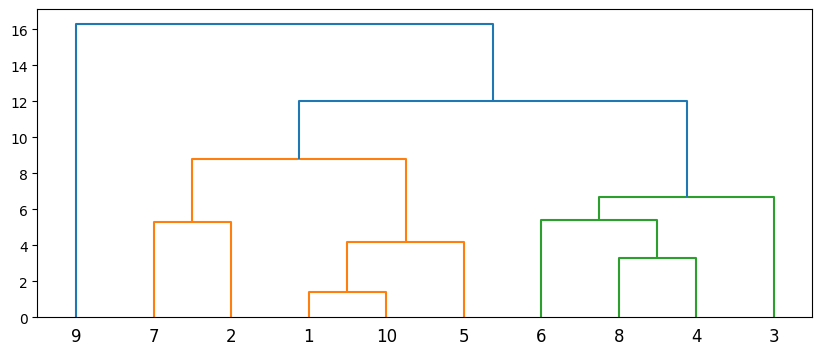

In [10]:
# 7
draw_dendrogram_df(df, method="complete")

In [9]:
# 8

In [10]:
# 9

In [11]:
# 10

In [12]:
# 11

In [13]:
# 12

In [15]:
# 13

In [7]:
def calculate_rss(values):
    return np.sum((values - np.mean(values)) ** 2)


## TO USE FOR REGRESSION TREES
def purity_gain_rss(parent_values, left_child_values, right_child_values):
    """
    Calculates the purity gain using RSS (Residual Sum of Squares) for a given split.

    Parameters:
    - parent_values (numpy.ndarray): Values of the parent node before the split.
    - left_child_values (numpy.ndarray): Values of the left child node after the split.
    - right_child_values (numpy.ndarray): Values of the right child node after the split.

    Returns:
    - float: Purity gain using RSS.
    """

    rss_parent = calculate_rss(parent_values)
    rss_left_child = calculate_rss(left_child_values)
    rss_right_child = calculate_rss(right_child_values)
    total_instances = len(parent_values)
    total_instances_left = len(left_child_values)
    total_instances_right = len(right_child_values)

    i_p = (1 / total_instances) * rss_parent
    i_l = (1 / total_instances_left) * rss_left_child
    i_r = (1 / total_instances_right) * rss_right_child

    print(f"Impurity PARENT      : {i_p}")
    print(f"Impurity LEFT CHILD  : {i_l}")
    print(f"Impurity RIGHT CHIKD : {i_r}")

    # Calculate the purity gain using RSS

    purity_gain = (
        i_p
        - (total_instances_left / total_instances) * i_l
        - (total_instances_right / total_instances) * i_r
    )

    return purity_gain

In [8]:
# 14
purity_gain_rss([23, 6, 17, 14, 13], [23], [6, 17, 14, 13])

Impurity PARENT      : 30.64
Impurity LEFT CHILD  : 0.0
Impurity RIGHT CHIKD : 16.25


17.638

In [17]:
# 15
def softmax(x):
    """
    calcola funzione di attivazione softmax dato in input un'osservazione x di qualsiasi dimensione
    """
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

In [18]:
# 16

In [20]:
# 18

In [21]:
# 19

In [22]:
# 20

In [38]:
# 21
# Esempio di utilizzo
x = np.array([[0.8, -1], [0.2, 1]])  # vettore x che contiene le osservazioni
w = np.array([[1, 1], [1, 1], [1, 1]])  # un peso per ciascuna classe

multinomial_regression(x, w)

Probabilità che x1 ([ 0.8 -1. ]) appartenga a classe 1 = 0.3333
Probabilità che x1 ([ 0.8 -1. ]) appartenga a classe 2 = 0.3333
Probabilità che x1 ([ 0.8 -1. ]) appartenga a classe 3 = 0.3333
Probabilità che x2 ([0.2 1. ]) appartenga a classe 1 = 0.3333
Probabilità che x2 ([0.2 1. ]) appartenga a classe 2 = 0.3333
Probabilità che x2 ([0.2 1. ]) appartenga a classe 3 = 0.3333


In [23]:
# 22


def adaboost(delta, rounds, weights=None):
    """
    delta : list of misclassified observations,
    0 = correctly classified, 1 = misclassified

    rounds [int] : how many rounds to run

    !!!CALL FOR EACH ROUND!!!

    Example:
    Given a classification problem with 25 observations in total,
    with 5 of them being misclassified in round 1, the weights can be calculated as:
    miss = np.zeros(25)
    miss[:5] = 1
    adaboost(miss, 1)

    The weights are printed
    """
    # Initial weights
    delta = np.array(delta)
    n = len(delta)
    if weights is None:
        weights = np.ones(n) / n
    else:
        weights = np.array(weights)

    # Run all rounds
    for i in range(rounds):
        eps = np.mean(delta)
        if eps <= 0 or eps >= 1:
            break  # Handling extreme cases to prevent division by zero or log(0)

        alpha = 0.5 * np.log((1 - eps) / eps)
        s = np.array([-1 if d == 0 else 1 for d in delta])

        # Update weights only for misclassified examples
        weights = weights * np.exp(s * alpha)
        weights /= np.sum(weights)  # Normalizing weights

    # Print resulting weights (consider improving this for larger datasets)

    print(f"Alpha: {alpha}")
    for i, w in enumerate(weights):
        print("w[%i]: %f" % (i, w))

    return weights

In [24]:
mis = [0, 1, 0, 1, 1, 0, 0]
adaboost(mis, 7)

Alpha: 0.14384103622589042
w[0]: 0.037772
w[1]: 0.282971
w[2]: 0.037772
w[3]: 0.282971
w[4]: 0.282971
w[5]: 0.037772
w[6]: 0.037772


array([0.03777202, 0.28297064, 0.03777202, 0.28297064, 0.28297064,
       0.03777202, 0.03777202])

In [25]:
# 23

In [25]:
def softmax(x):
    """
    calcola funzione di attivazione softmax dato in input un'osservazione x di qualsiasi dimensione
    """
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)


def multinomial_regression(x, w):
    """
    Calcola la probabilità che l'osservazione x appartenga a una classe usando il classificatore di regressione multinomiale.

    Args:
    x (array): Vettore di osservazioni di qualsiasi dimensione.
    w (array): Vettore dei pesi (un peso per ogni classe, i pesi devono avere la stessa dimensione delle osservazioni).

    Returns:
    None (stampa le probabilità per ogni classe per ciascuna osservazione)
    """
    probabilities = softmax(np.dot(x, np.transpose(w)))

    for i, x_i in enumerate(x):
        for j, theta_j in enumerate(probabilities[i]):
            print(
                f"Probabilità che x{i+1} ({x_i}) appartenga a classe {j+1} = {theta_j:.4f}"
            )

In [26]:
# Esempio di utilizzo
x = np.array([1, -5.52, -4.69])  # vettore x che contiene le osservazioni
w = np.array([[0.04, 1.32, -1.48], [-0.03, 0.7, -0.85]])  # un peso per ciascuna classe

multinomial_regression(x, w)

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [47]:
from sklearn.cluster import KMeans
import numpy as np


def kmeans_1d(x, k, centroids=None):
    """
    Assegna cluster ai valori in un array 1D usando l'algoritmo K-Means.

    Parameters:
    -----------
    x : list of values to cluster
    k : number of clusters
    centroids : values to initialize clusters at (optional)

    Returns:
    --------
    None (prints the assigned clusters and cluster centers)
    """
    x = np.array(x).reshape(-1, 1)

    if centroids is None:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(x)
    else:
        centroids = np.array(centroids).reshape(-1, 1)

        # Repeat centroids to match the length of x
        repeated_centroids = np.tile(centroids, len(x) // len(centroids))
        repeated_centroids = np.concatenate(
            (repeated_centroids, centroids[: len(x) % len(centroids)])
        )

        initial_indices = np.argmin(np.abs(x - repeated_centroids), axis=0)
        initial_centroids = repeated_centroids[initial_indices].reshape(-1, 1)

        kmeans = KMeans(
            n_clusters=k, init=initial_centroids, n_init=1, random_state=42
        ).fit(x)

    clusters = kmeans.predict(x)
    centers = kmeans.cluster_centers_.flatten()

    print("The assigned clusters are: {}".format(clusters))
    print(
        "The cluster centers of the converged K-Means algorithm are: {}".format(centers)
    )
    return None


x = [0, 2, 4, 5, 6, 7, 14]
k = 3
cent = [1, 5, 8]

kmeans_1d(x, k, centroids=cent)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1

In [27]:
# 25

In [28]:
# 26

In [29]:
# 27